In [2]:
%reload_ext autoreload
%autoreload 2

from analyze import mult_sim_analysis
from constants import out_file_path, COLOR_MAP
from si_types import OutputParameters

/Users/vivian/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/vivian/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


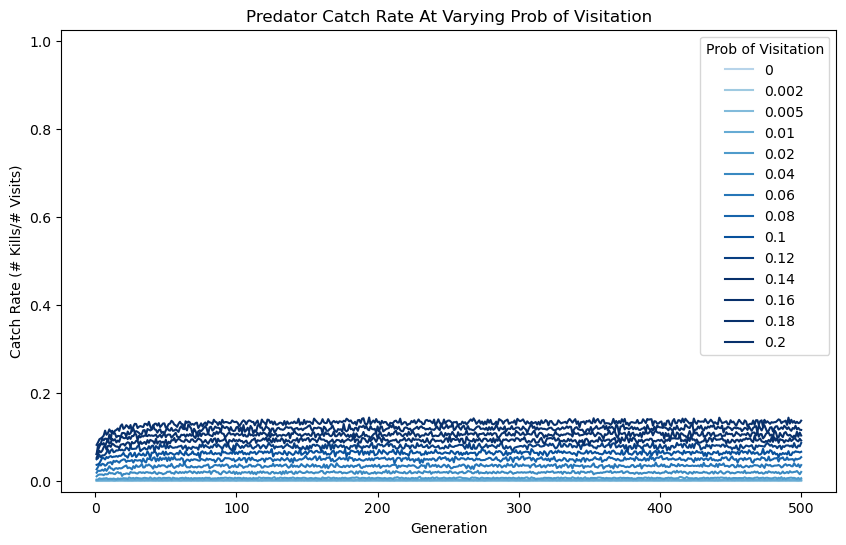

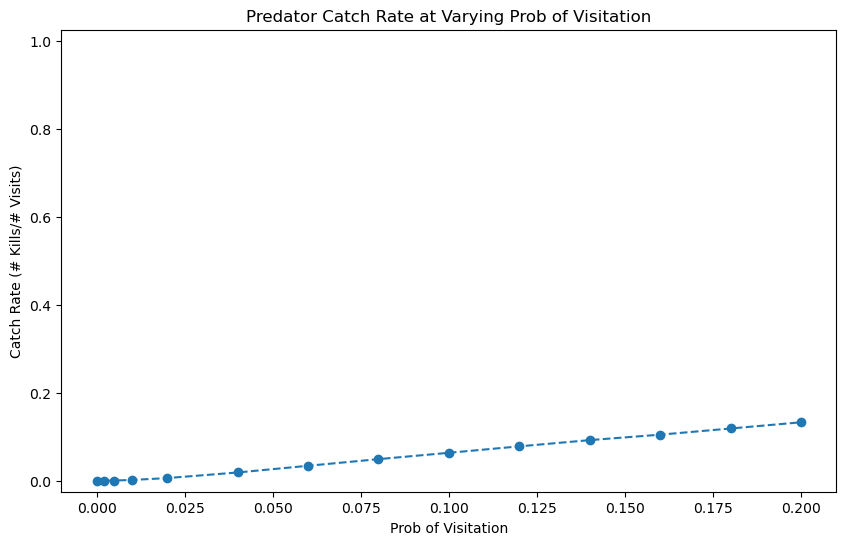

In [3]:
def get_params_to_analyze(analysis):
  params = []
  param = ""

  if analysis == "pop_size":
    for max_group_size in [15, 25, 50]:
      for Ni in [100, 500]:
        params.append(OutputParameters(max_group_size=max_group_size, Ni=Ni, group_bin_size=int(max_group_size/5)))
    return [params], "pop_size"
  
  if analysis == "group_size":
    for max_group_size in [5, 10, 15, 20, 25, 30, 40, 50, 100]:
      params.append(OutputParameters(max_group_size=max_group_size, group_bin_size=int(max_group_size/5)))
    return [params], "avg_group_size"
  
  if analysis == "pred":
    for prob_pred in [0, 0.002, 0.005, 0.01, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2]:
      params.append(OutputParameters(prob_pred=prob_pred))
    return [params], "prob_pred"

  if analysis == "e_gain/prob_pred":
    for e_gain in [0.5, 1, 1.5, 2]:
      params.append([])
      for prob_pred in [0.02, 0.06, 0.08, 0.1, 0.2]:
        params[-1].append(OutputParameters(prob_pred=prob_pred, e_gain=e_gain))
    return params, "prob_pred"

  return params, param

def run_mult_sim_analysis(params, param):
  for param_set in params:
    mult_sim_analysis(
      out_file_path=out_file_path,
      all_params=param_set,
      plots=[
        # "flight_freq_by_group_size",
        # "fitness",
        # "all_mean_trait_values",
        # "avg_flight",
        # "detected_nondetected_pred_deaths",
        # "total_deaths_per_gen",
        # "final_fitness",
        # "final_trait_values",
        # "final_flight_freq",
        # "kills_per_visits_per_gen",
        # "final_kills_per_visits",
      ],
      param=param,
    )

params, param = get_params_to_analyze("pred")
run_mult_sim_analysis(params, param)